We will work through the LAB for linear regression chapter in ISLR.

Basic functions that perform least squares linear regression and other simple analyses come
standard with the base distribution named MASS. So we use the library() function to run it.

In [1]:
lodalibraries=function(){
    library('MASS')
    library('ISLR')
    print('Libraries Loaded')
}

In [2]:
lodalibraries()

Warning message:
"package 'ISLR' was built under R version 3.5.2"

[1] "Libraries Loaded"


# Simple linear regression:

In [59]:
fix(Auto)

In [4]:
attach(Auto)
slrf=lm(mpg~horsepower,data=Auto)
summary(slrf)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


Look at the cell below for results and how to get them:


i- Since the p-value is small then there is a relation between the response and predictor.


ii- We use the value of RSE/mean of the response to have an idea on the error and how much it's big for this partucular problem 20,92% and R squared which is the amount of variability in mpg explained by horsepower is: 60.59%.


iii- As you can notice from the summary of the model, horsepower coefficient is negative then the relation between mpg and horsepower is negative, in the sense that the more we have horsepower the less we have mpg, which acctualy makes sense since high specs vehicules consume more gas.


iv-Look at the cell below.


In [10]:
print('The error rate is:')
100*summary(slrf)$sigma/mean(mpg)
print('The percentage of contribution of horsepower in explaining mpg is:')
100*summary(slrf)$r.squared
print('Predicting mpg for horsepower of 98:')
predict(slrf,data.frame(horsepower=98))
print('The interval of confidence associated to this prediction is:')
predict(slrf,data.frame(horsepower=98),interval = 'confidence')
print('The interval of prediction associated to this prediction is:')
predict(slrf,data.frame(horsepower=98),interval = 'prediction')

[1] "The error rate is:"


[1] 20.92371

[1] "The percentage of contribution of horsepower in explaining mpg is:"


[1] 60.59483

[1] "Predicting mpg for horsepower of 98:"


1 
24.46708

[1] "The interval of confidence associated to this prediction is:"


,fit,lwr,upr
1,24.46708,23.97308,24.96108


[1] "The interval of prediction associated to this prediction is:"


,fit,lwr,upr
1,24.46708,14.8094,34.12476


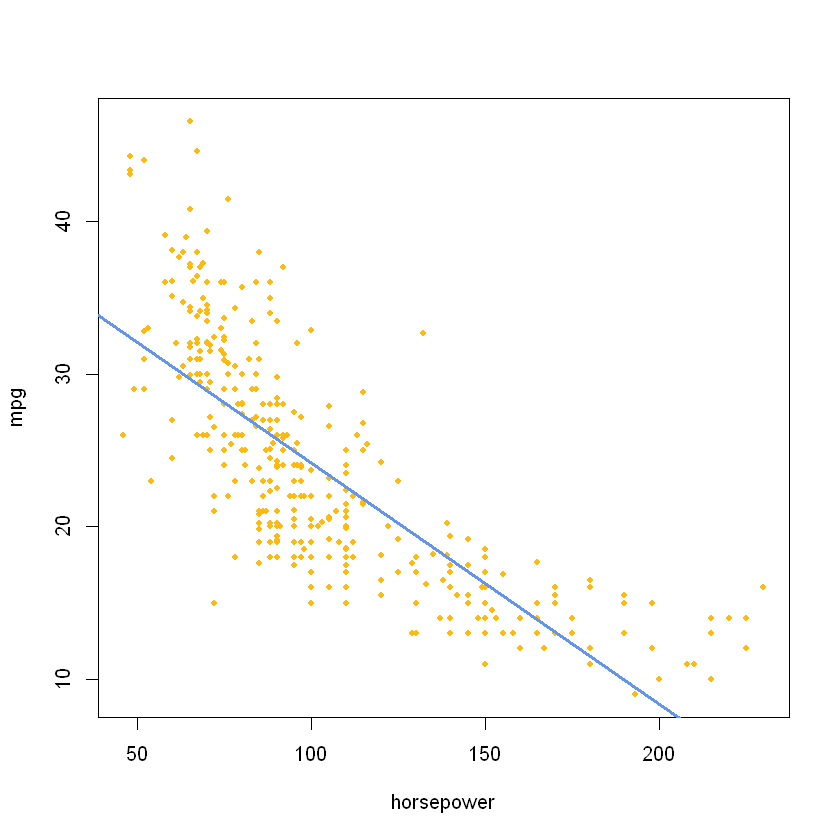

In [13]:
plot(horsepower,mpg,col='darkgoldenrod1',pch=20)
abline(slrf,col='cornflowerblue',lwd=3)

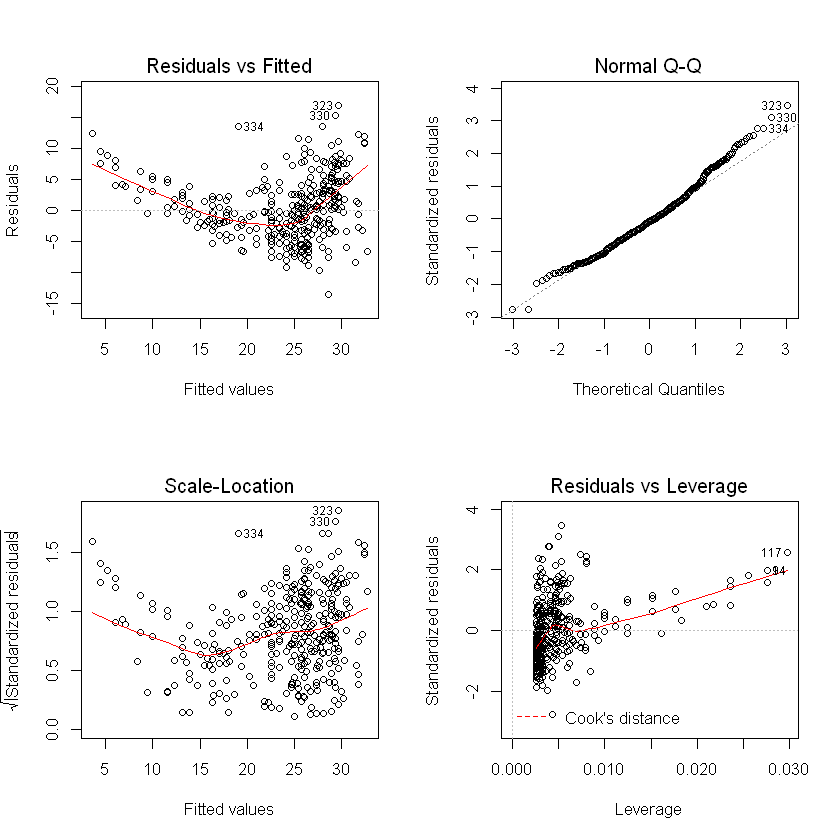

In [15]:
par(mfrow=c(2,2))
plot(slrf)

From the first graphic Residuals Vs Fitted we notice signs of non linear relationship between predictor and response.

From the Q-Q plot we the standarized residuals do not have a perfect normal distribution.

We can also report having a number of data points with high leverage. But in the other hand we don't have much outliers. To make sure I'll draw two plots in the folowing cell to illustrate this more clearly. 

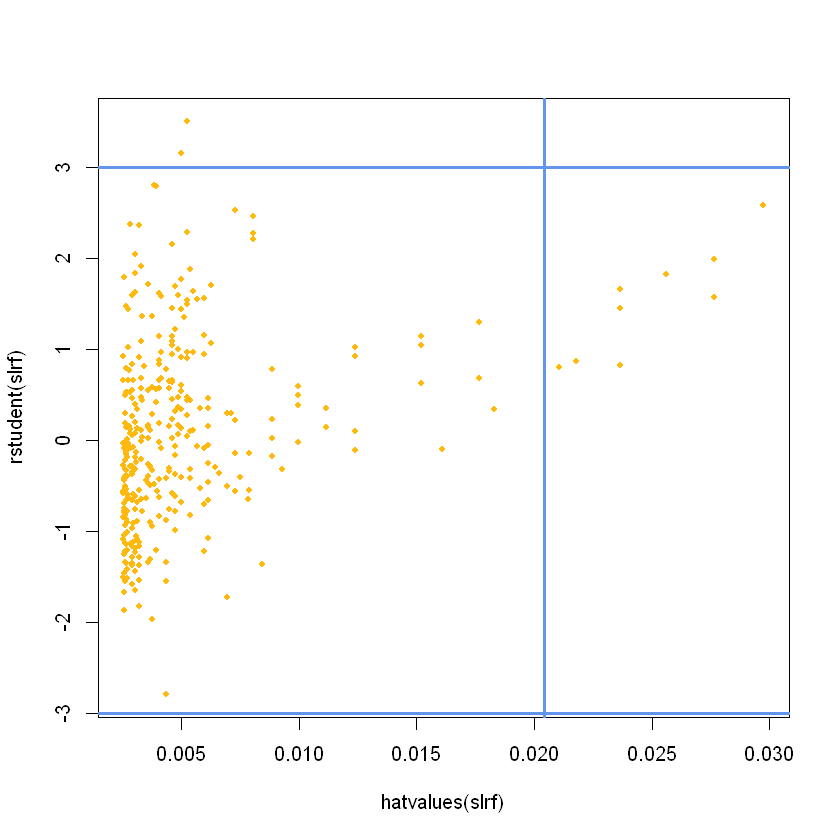

In [30]:
plot(hatvalues(slrf),rstudent(slrf),col='darkgoldenrod1',pch=20)
abline(3,0,col='cornflowerblue',lwd=3)
abline(-3,0,col='cornflowerblue',lwd=3)
abline(v=4*2/nrow(Auto),col='cornflowerblue',lwd=3)

#The data points outside the (-3,3) are likely to be outliers, we only have 2 of them!
#Are considered high leverage observation the ones for which the hatvalue calculated by the leverage statistic is greatly 
#higher than the average which of the leverage statistic which is (p+1)/n for p predictors. In our case 2/n. I will consider
#greatly high than average as more than 4 times higher.

# Multiple linear regression:

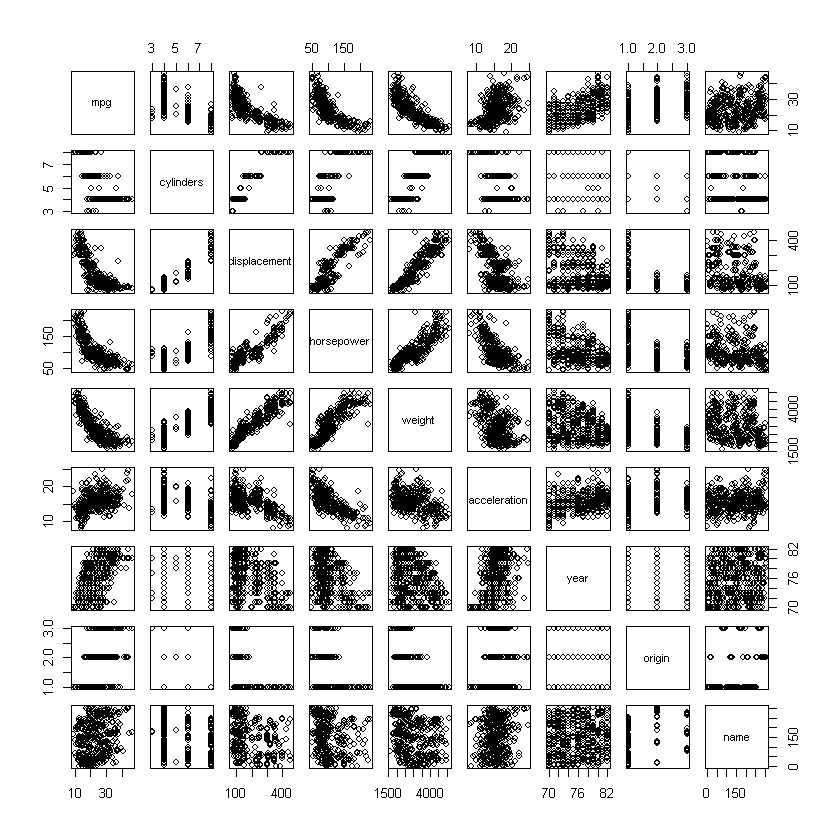

In [31]:
#Scaterplots
pairs(Auto)

In [39]:
cor(subset(Auto,select=-name))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


In [43]:
auto=subset(Auto,select=-name)
mlrf=lm(mpg~.,data=auto)
summary(mlrf)


Call:
lm(formula = mpg ~ ., data = auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


i- We have predictors that yielded small p-value inicating a significant relationship with the reponse, and others predictors for which we fail to reject the null hypothesis and thus are insignificant for predicting the response mpg.


ii-displacement,weight,year and origin seem to statisticaly have a significant relationship to mpg.


iii- The coefficient of year since positive and significant indicates that mpg increase by the year, which means through the years the industry is making vehicules that have more mpg ration. Which is a logical result.


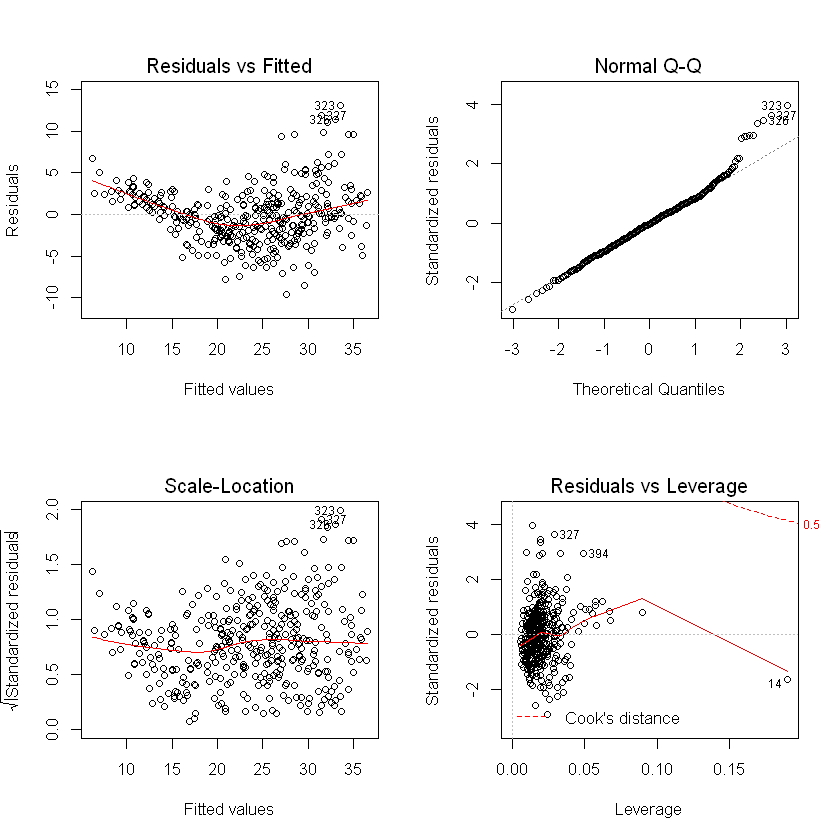

In [45]:
par(mfrow=c(2,2))
plot(mlrf)

The plots indicate a non-linear relationship since the residuals seems to have a certain pattern.


Also Q-Q plots indicate that the residuals follow a normal distribution except for some points which are suspect of being outliers. 


For high leverage points it seems to be that we don't have data points with unusual x values.

I will draw my own plot now to confirm results!


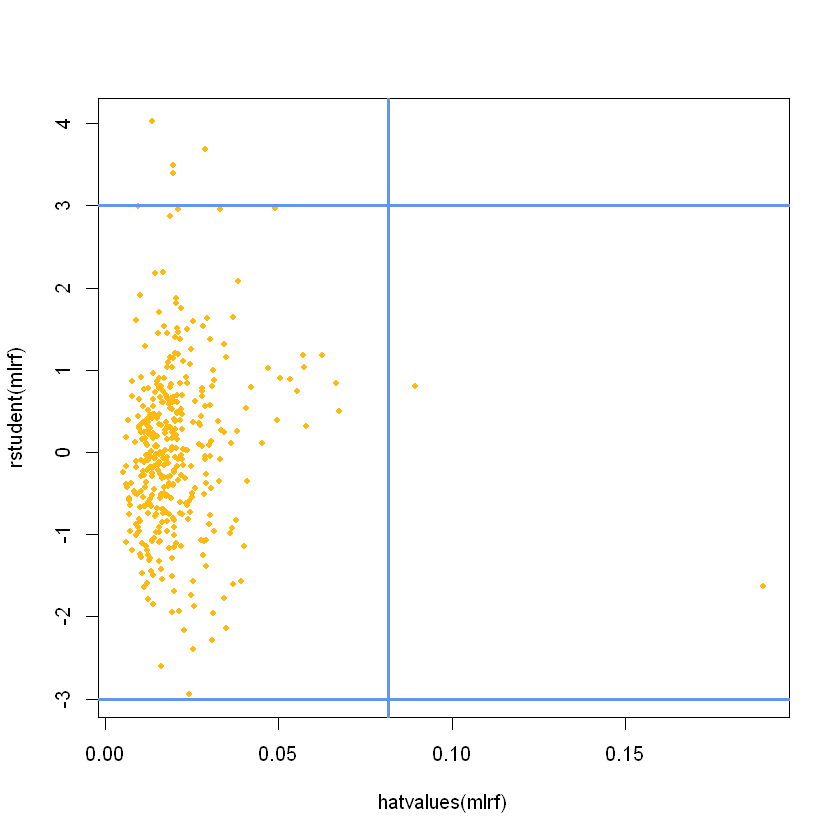

In [47]:
plot(hatvalues(mlrf),rstudent(mlrf),col='darkgoldenrod1',pch=20)
abline(3,0,col='cornflowerblue',lwd=3)
abline(-3,0,col='cornflowerblue',lwd=3)
abline(v=4*8/nrow(Auto),col='cornflowerblue',lwd=3)

# As you can see we have 4-6 outliers and 2 high leverage data points, and luckly no combinaison of the two of them! 

The correlation matrix suggest strong relationships between predictors so we have a situation of collinearity that acctualy what explains that now horsepower is insignificant while it was significant for SLR model. The thing is that with collinearity we cannot distinguish the individual contributions of the predictors and fail to reject the null hypothesis for some predictors. Although since correlated these predictors have the same information about the response so we only remove these predictors representing redundant information.

In [50]:
mlrf1=lm(mpg~displacement+weight+origin+year,data=Auto)
summary(mlrf1)


Call:
lm(formula = mpg ~ displacement + weight + origin + year, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8102 -2.1129 -0.0388  1.7725 13.2085 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.861e+01  4.028e+00  -4.620 5.25e-06 ***
displacement  5.588e-03  4.768e-03   1.172    0.242    
weight       -6.575e-03  5.571e-04 -11.802  < 2e-16 ***
origin        1.226e+00  2.670e-01   4.593 5.92e-06 ***
year          7.714e-01  4.981e-02  15.486  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.346 on 387 degrees of freedom
Multiple R-squared:  0.8181,	Adjusted R-squared:  0.8162 
F-statistic: 435.1 on 4 and 387 DF,  p-value: < 2.2e-16


In [66]:
#Now displacement is insignificant!
mlrf2=lm(mpg~weight+origin+year,data=Auto)
summary(mlrf2)
#Now let's include include interractions terms, to cover any synergies within predictors.
mlrf3=lm(mpg~weight*origin+weight*year+origin*year,data=Auto)
summary(mlrf3)
#Now let's include modifications on the predictors to cover the non-linearity of the relationship
mlrf4=lm(mpg~I(log(weight))+I(log(origin))+I(log(year)),data=Auto)
summary(mlrf4)
mlrf5=lm(mpg~poly(weight,2)+poly(origin,2)+poly(year,2),data=Auto)
summary(mlrf5)


Call:
lm(formula = mpg ~ weight + origin + year, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9440 -2.0948 -0.0389  1.7255 13.2722 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.805e+01  4.001e+00  -4.510 8.60e-06 ***
weight      -5.994e-03  2.541e-04 -23.588  < 2e-16 ***
origin       1.150e+00  2.591e-01   4.439 1.18e-05 ***
year         7.571e-01  4.832e-02  15.668  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.348 on 388 degrees of freedom
Multiple R-squared:  0.8175,	Adjusted R-squared:  0.816 
F-statistic: 579.2 on 3 and 388 DF,  p-value: < 2.2e-16



Call:
lm(formula = mpg ~ weight * origin + weight * year + origin * 
    year, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3861 -1.7991 -0.2057  1.4539 12.0334 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.046e+02  2.068e+01  -5.055 6.65e-07 ***
weight         2.445e-02  5.221e-03   4.683 3.92e-06 ***
origin         4.737e+00  5.116e+00   0.926  0.35506    
year           1.864e+00  2.747e-01   6.784 4.43e-11 ***
weight:origin -1.483e-03  4.755e-04  -3.119  0.00195 ** 
weight:year   -3.862e-04  7.103e-05  -5.437 9.65e-08 ***
origin:year   -4.213e-03  6.566e-02  -0.064  0.94887    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.11 on 385 degrees of freedom
Multiple R-squared:  0.8437,	Adjusted R-squared:  0.8413 
F-statistic: 346.3 on 6 and 385 DF,  p-value: < 2.2e-16



Call:
lm(formula = mpg ~ I(log(weight)) + I(log(origin)) + I(log(year)), 
    data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9298 -2.0228 -0.0206  1.6119 13.1496 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -80.2021    17.1444  -4.678 4.01e-06 ***
I(log(weight)) -19.0831     0.7406 -25.765  < 2e-16 ***
I(log(origin))   1.4299     0.4417   3.237  0.00131 ** 
I(log(year))    58.9116     3.4076  17.288  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.135 on 388 degrees of freedom
Multiple R-squared:  0.8399,	Adjusted R-squared:  0.8387 
F-statistic: 678.4 on 3 and 388 DF,  p-value: < 2.2e-16



Call:
lm(formula = mpg ~ poly(weight, 2) + poly(origin, 2) + poly(year, 
    2), data = Auto)

Residuals:
   Min     1Q Median     3Q    Max 
-9.077 -1.628  0.045  1.457 12.996 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        23.4459     0.1463 160.229  < 2e-16 ***
poly(weight, 2)1 -100.6436     3.8471 -26.161  < 2e-16 ***
poly(weight, 2)2   29.3866     3.0594   9.605  < 2e-16 ***
poly(origin, 2)1    9.9958     3.7489   2.666  0.00799 ** 
poly(origin, 2)2   -8.3782     3.0007  -2.792  0.00550 ** 
poly(year, 2)1     61.7015     3.1205  19.773  < 2e-16 ***
poly(year, 2)2     16.1691     2.9340   5.511 6.55e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.897 on 385 degrees of freedom
Multiple R-squared:  0.8643,	Adjusted R-squared:  0.8622 
F-statistic: 408.8 on 6 and 385 DF,  p-value: < 2.2e-16


As we move towards a non-linear predictors we get better R-squared and less error rate, although we must keep in mind this is only the training error and judging the quality of the model from it is certainly biased.

In [96]:
names(summary(mlrf))

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [120]:
models=list(mlrf1,mlrf2,mlrf3,mlrf4,mlrf5)
pred=list()
r=list()
rse=list()
error=list()
for (model in models) {
    pred=append(pred,toString(summary(model)$call))
    r=append(r,summary(model)$r.squared)
    rse=append(rse,summary(model)$sigma) 
    #error=append(error,)
}
pred=unlist(pred)
r=unlist(r)
rse=unlist(rse)
results=data.frame("Model"=1:5,"Predictors"=pred,"R-squared"=r,"RSE"=rse,'Error'=100*rse/mean(mpg))
results

Model,Predictors,R.squared,RSE,Error
1,"lm, mpg ~ displacement + weight + origin + year, Auto",0.8180977,3.345995,14.27112
2,"lm, mpg ~ weight + origin + year, Auto",0.8174522,3.347605,14.27798
3,"lm, mpg ~ weight * origin + weight * year + origin * year, Auto",0.8436896,3.109748,13.26350
4,"lm, mpg ~ I(log(weight)) + I(log(origin)) + I(log(year)), Auto",0.8398884,3.135142,13.37181
5,"lm, mpg ~ poly(weight, 2) + poly(origin, 2) + poly(year, 2), Auto",0.8643326,2.897138,12.35668


# 11-

In [144]:
set.seed(1)
x=rnorm(100)
y=2*x+rnorm(100)

In [146]:
slrwi1=lm(y~x+0)
summary(slrwi1)


Call:
lm(formula = y ~ x + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9154 -0.6472 -0.1771  0.5056  2.3109 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   1.9939     0.1065   18.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9586 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


We have an estimate for beta equal to 1,9939 really close to the actual value 2. The p-value corresponding to null hypothesis is almost so the relationship as we know exists and we reject the null hypothesis. R squared is 0,7798 is a little lower than you would expect but it's high enough the RSE is small and equal to 0,9586.

In [147]:
slrwi2=lm(x~y+0)
summary(slrwi2)


Call:
lm(formula = x ~ y + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8699 -0.2368  0.1030  0.2858  0.8938 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
y  0.39111    0.02089   18.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4246 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


We can say the exact same thing about the reverse regression, but instead in this situation beta actual value would be 0,5 and we will try to estimate that by least squares the estimate is 0,391 which is off by 0,1, worst estimate than for y~x coefficient. 


c- We trying to modelize the same problem first $y=2*x+\varepsilon$  and after $x=0,5*(y-\varepsilon)$ instead. 

d- For simple linear regression without intercept we have: 
         $SE(\hat{\beta})=\sqrt{\frac{\sum_{i=1}^{n}(y_i-\hat{\beta} x_i)^2}{(n-1)\sum_{i=1}^{n}x_i^2}}$ and $\hat{\beta}=\frac{\sum_{i=1}^{n}y_ix_i}{\sum_{i=1}^{n}x_i^2}$
  
  
  $t=\frac{\hat\beta}{SE(\hat{\beta})}$ 
  
  $t=\frac{\sum_{i=1}^{n}y_ix_i}{\sum_{i=1}^{n}x_i^2} \sqrt{\frac{(n-1)\sum_{i=1}^{n}x_i^2}{\sum_{i=1}^{n}(y_i-\hat{\beta} x_i)^2}}$ 
  
  $t=\frac{\sqrt{n-1}\sum_{i=1}^{n}y_ix_i}{\sqrt{\sum_{i=1}^{n}x_i^2(\sum_{i=1}^{n}y_i^2-2\hat{\beta}\sum_{i=1}^{n}y_ix_i+\hat{\beta}^2\sum_{i=1}^{n}x_i^2)}}$

Let A be: 

$A=\sum_{i=1}^{n}x_i^2(\sum_{i=1}^{n}y_i^2-2\hat{\beta}\sum_{i=1}^{n}y_ix_i+\hat{\beta}^2\sum_{i=1}^{n}x_i^2)$

then:

$A=(\sum_{i=1}^{n}x_i^2)(\sum_{i=1}^{n}y_i^2)-2\frac{\sum_{i=1}^{n}y_ix_i}{\sum_{i=1}^{n}x_i^2}\sum_{i=1}^{n}y_ix_i\sum_{i=1}^{n}x_i^2+(\frac{\sum_{i=1}^{n}y_ix_i}{\sum_{i=1}^{n}x_i^2})^2(\sum_{i=1}^{n}x_i^2)^2$

it is finally simple to get to:

$A=(\sum_{i=1}^{n}x_i^2)(\sum_{i=1}^{n}y_i^2)-(\sum_{i=1}^{n}y_ix_i)^2$
  
And we conclude that: 

$t=\frac{\sqrt{n-1}\sum_{i=1}^{n}y_ix_i}{\sqrt{A}}=\frac{\sqrt{n-1}\sum_{i=1}^{n}y_ix_i}{\sqrt{(\sum_{i=1}^{n}x_i^2)(\sum_{i=1}^{n}y_i^2)-(\sum_{i=1}^{n}y_ix_i)^2}}$
  


In [149]:
#let's compare t-values for both models, well by inspecting formula more closely you will notice we'll have same t-value for both models:
length(x)
length(y)
t=sqrt(length(x)-1)*sum(y*x)/sqrt(sum(x^2)*sum(y^2)-(sum(y*x))^2)
print(t)
#We get the same result as both models.

[1] 100

[1] 100

[1] 18.72593


(e) We just proved that algebraically and in R.

(f) Let's prove the last result for SLR with intercept.

In [151]:
set.seed(1)
x=rnorm(100)
y=2*x+rnorm(100)
slr1=lm(y~x)
slr2=lm(x~y)
summary(slr1)
summary(slr2)
#As you see below both t-values of the intercept null hypothesis are equal for the 2 models.


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8768 -0.6138 -0.1395  0.5394  2.3462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.03769    0.09699  -0.389    0.698    
x            1.99894    0.10773  18.556   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9628 on 98 degrees of freedom
Multiple R-squared:  0.7784,	Adjusted R-squared:  0.7762 
F-statistic: 344.3 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = x ~ y)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90848 -0.28101  0.06274  0.24570  0.85736 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03880    0.04266    0.91    0.365    
y            0.38942    0.02099   18.56   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4249 on 98 degrees of freedom
Multiple R-squared:  0.7784,	Adjusted R-squared:  0.7762 
F-statistic: 344.3 on 1 and 98 DF,  p-value: < 2.2e-16


12- Easy exercise, I'll just leave the hint and move on. The intercept is the same for both models of y on x and x on y is when: $\sum_{i=1}^{n}x_i^2=\sum_{i=1}^{n}y_i^2$

# 13-

In [212]:
set.seed(5)
x=rnorm(100)
eps=rnorm(100,mean=0,sd=0.25)
y=-1+0.5*x+eps

In [213]:
beta0=-1
beta1=0.5
leny=length(y) #100 obviously!

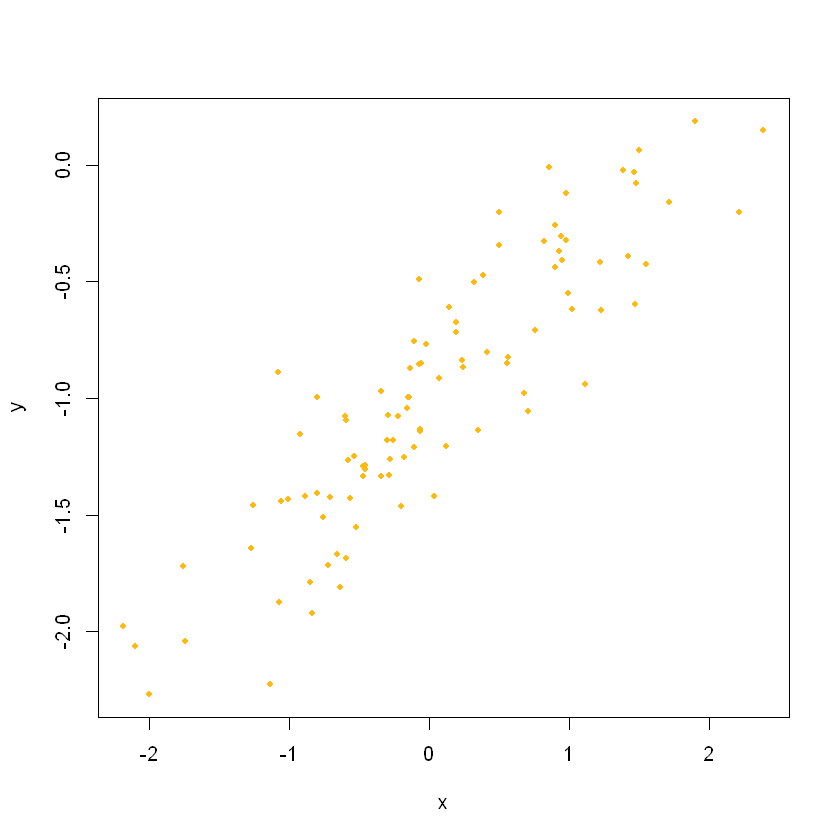

In [214]:
plot(x,y,col='darkgoldenrod1',pch=20)

In [215]:
slrff1=lm(y~x)
summary(slrff1)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62059 -0.15387  0.02532  0.18585  0.68291 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.99693    0.02611  -38.18   <2e-16 ***
x            0.53328    0.02775   19.22   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.261 on 98 degrees of freedom
Multiple R-squared:  0.7903,	Adjusted R-squared:  0.7882 
F-statistic: 369.4 on 1 and 98 DF,  p-value: < 2.2e-16


The model have a little error term 0.261 and somehow high $R^2$ value of 0,79 this due to the values of $\hat{\beta_0}$ and $\hat{\beta_1}$ that are close to the actual values.

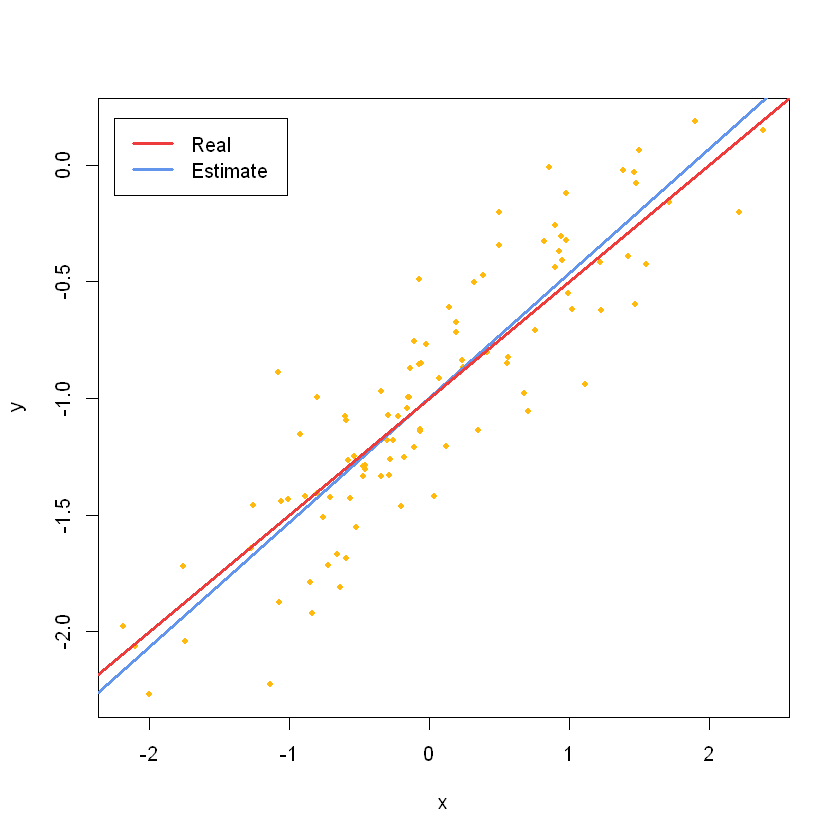

In [216]:
plot(x,y,col='darkgoldenrod1',pch=20)
abline(slrff1,lwd=3,col='cornflowerblue')
abline(-1,0.5,lwd=3,col='brown2')
legend(-2.25,0.2,legend=c('Real','Estimate'),col=c('brown2','cornflowerblue'),lwd=3)

In [217]:
slrfq=lm(y~poly(x,2))
summary(slrfq)


Call:
lm(formula = y ~ poly(x, 2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61154 -0.16155  0.01887  0.20026  0.68997 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.98005    0.02617 -37.448   <2e-16 ***
poly(x, 2)1  5.01572    0.26171  19.165   <2e-16 ***
poly(x, 2)2 -0.17489    0.26171  -0.668    0.506    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2617 on 97 degrees of freedom
Multiple R-squared:  0.7913,	Adjusted R-squared:  0.787 
F-statistic: 183.9 on 2 and 97 DF,  p-value: < 2.2e-16


We notice very slight decrease in $R^2$ and $RSE$ this is to be expected, as we get the model more flexible we fit more the learning data, although this change is not that significant, since the p-value related the the null hypothesis concerning the coefficient for $x^2$ is very large. So no, no improvement have been introduced by the quadratic term. Logical enough since the true relationship is linear.

In [226]:
#We change the value of eps to 0.1
set.seed(5)
x=rnorm(100)
eps=rnorm(100,mean=0,sd=0.1)
y=-1+0.5*x+eps

In [227]:
slrff2=lm(y~x)
summary(slrff2)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24824 -0.06155  0.01013  0.07434  0.27316 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.99877    0.01044  -95.62   <2e-16 ***
x            0.51331    0.01110   46.25   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1044 on 98 degrees of freedom
Multiple R-squared:  0.9562,	Adjusted R-squared:  0.9557 
F-statistic:  2139 on 1 and 98 DF,  p-value: < 2.2e-16


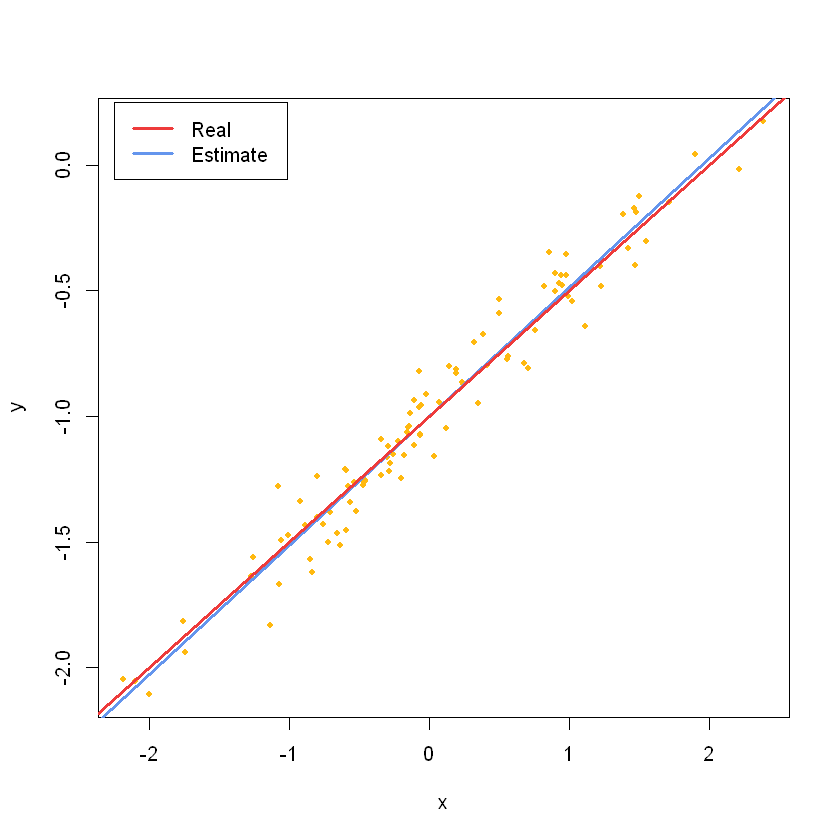

In [228]:
plot(x,y,col='darkgoldenrod1',pch=20)
abline(slrff2,lwd=3,col='cornflowerblue')
abline(-1,0.5,lwd=3,col='brown2')
legend(-2.25,0.25,legend=c('Real','Estimate'),col=c('brown2','cornflowerblue'),lwd=3)
#As you can see the two lines the estimated and real are almost identical  

As you would expect reducing the variance of the irreductible error will make the linear regression perform better and get close as possible to the actual function.

In [229]:
#We change the value of eps to 0.5
set.seed(5)
x=rnorm(100)
eps=rnorm(100,mean=0,sd=0.5)
y=-1+0.5*x+eps

In [230]:
slrff3=lm(y~x)
summary(slrff3)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24118 -0.30774  0.05064  0.37170  1.36583 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.99385    0.05222  -19.03   <2e-16 ***
x            0.56656    0.05549   10.21   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5219 on 98 degrees of freedom
Multiple R-squared:  0.5154,	Adjusted R-squared:  0.5105 
F-statistic: 104.2 on 1 and 98 DF,  p-value: < 2.2e-16


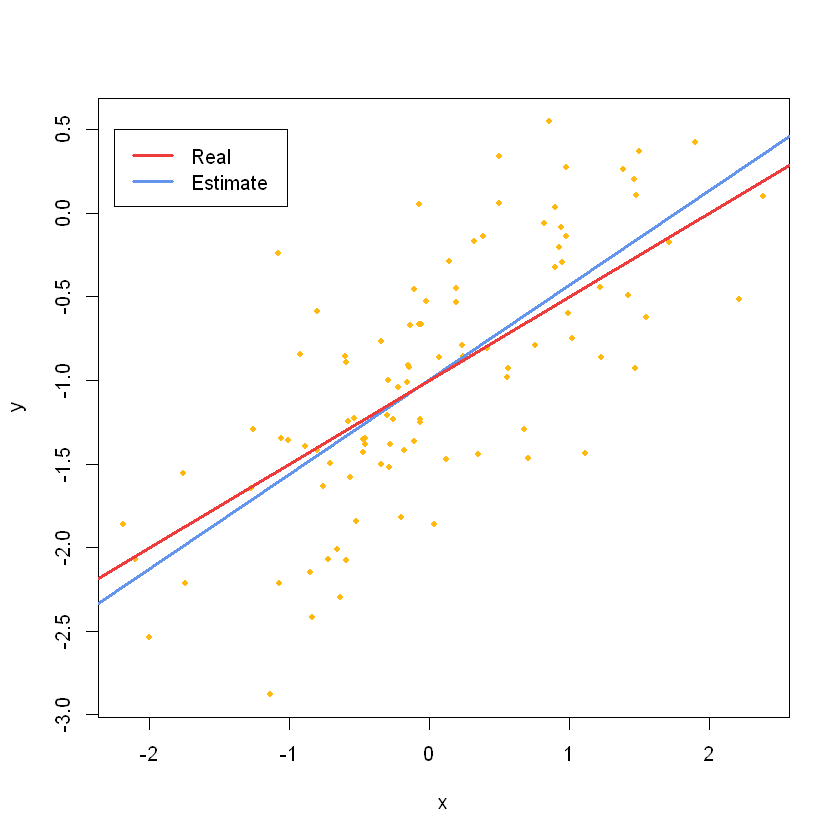

In [233]:
plot(x,y,col='darkgoldenrod1',pch=20)
abline(slrff3,lwd=3,col='cornflowerblue')
abline(-1,0.5,lwd=3,col='brown2')
legend(-2.25,0.5,legend=c('Real','Estimate'),col=c('brown2','cornflowerblue'),lwd=3)
#As you can see the two lines the estimated and real are almost identical  

As you would expect increasing the variance of the irreductible error will make the linear regression perform worse than before and be largely off the actual function.

In [234]:
summary(slrff3))

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [238]:
confint(slrff1)
confint(slrff2)
confint(slrff3)

,2.5 %,97.5 %
(Intercept),-1.0487431,-0.9451071
x,0.4782154,0.5883401


,2.5 %,97.5 %
(Intercept),-1.0194973,-0.9780428
x,0.4912861,0.5353361


,2.5 %,97.5 %
(Intercept),-1.0974863,-0.8902142
x,0.4564307,0.6766803
